## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = mouse_metadata.merge(study_results, on = "Mouse ID", how = 'outer')
# Display the data table for preview
combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(combine['Mouse ID'].value_counts())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_check = combine.groupby(['Mouse ID', 'Timepoint'])['Timepoint'].count().reset_index('Mouse ID')
dups = dups_check.loc[dups_check['Timepoint'] > 1]
dups

,Mouse ID,Timepoint
Timepoint,,
0,g989,2
5,g989,2
10,g989,2
15,g989,2
20,g989,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combine.set_index('Mouse ID').loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine = combine.set_index('Mouse ID').drop('g989').reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
len(combine['Mouse ID'].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouping = combine.groupby('Drug Regimen')['Tumor Volume (mm3)']
group_summary_stats = pd.DataFrame({
    "Mean":  round(grouping.mean(), 2),
    "Median":  round(grouping.median(), 2),
    "Variance":  round(grouping.var(), 2),
    "Standard Deviation":  round(grouping.std(), 2),
    "Standard Error": round(grouping.sem(ddof=1), 2)
}
)  
group_summary_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'], axis='columns').apply(lambda x: round(x, 2))
aggregate_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [9]:
#Get an Array that has the total count of mice in each treatment condition.
group_size = combine.drop_duplicates('Mouse ID').groupby('Drug Regimen')['Mouse ID'].count()

<AxesSubplot:title={'center':'Number of Mice per Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

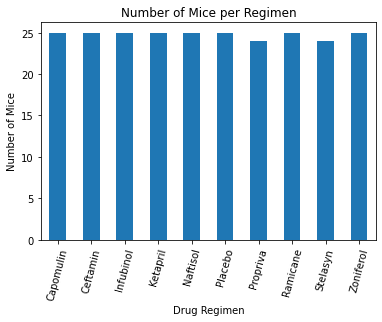

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
group_size.plot(kind = 'bar', rot = 75, title='Number of Mice per Regimen', ylabel = 'Number of Mice')

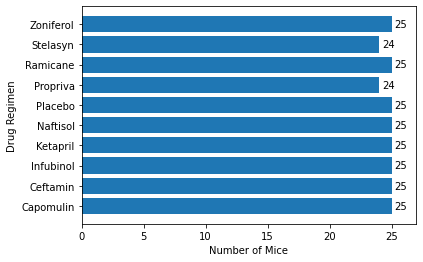

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
gsize_plot, ax = plt.subplots()
ax.set_ylabel('Drug Regimen')
ax.set_xlabel('Number of Mice')
ax.set_xlim(0, 27)
#I decided to make this a horzontal graph to better display the names of the drugs.
#I make the graph equal to hbar rather than simply setting it so that I can pass those bars to the bar_label method below.
hbars = ax.barh(group_size.index, group_size, align = 'center')
#bar_labels is a method from matplotlib 3.4+, and will only work if matplotlib has its most recent version.
ax.bar_label(hbars, padding=3)
plt.show()

In [26]:
#Create a object with the sex ratios to graph off of in the following example.
male_female = combine.groupby('Sex')['Sex'].count()

<AxesSubplot:title={'center':'Sex of Subjects'}, ylabel='Sex'>

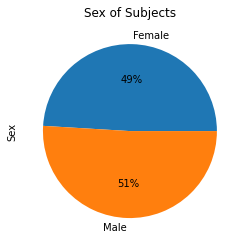

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#I pass autopct as a kwarg from pd.plot into matplotlib.
male_female.plot(kind='pie', title="Sex of Subjects", autopct = '%1.f%%', )

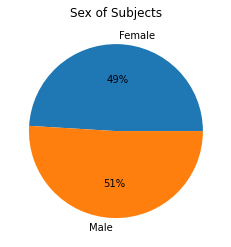

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_pie, mf_ax = plt.subplots() 
mf_ax.pie(male_female, autopct='%1.f%%', labels=male_female.index)
plt.title('Sex of Subjects')
plt.show()

In [69]:
#Finally, I am going to do an additional chart showing the sex of subjects broken into groups. 
mf_treatment = combine.drop_duplicates('Mouse ID').groupby(['Sex', 'Drug Regimen'])['Sex'].count()

In [70]:
mf_treatment.loc['Male']

Drug Regimen
Capomulin    12
Ceftamin     12
Infubinol    13
Ketapril     16
Naftisol     12
Placebo      12
Propriva     13
Ramicane     16
Stelasyn      9
Zoniferol    10
Name: Sex, dtype: int64

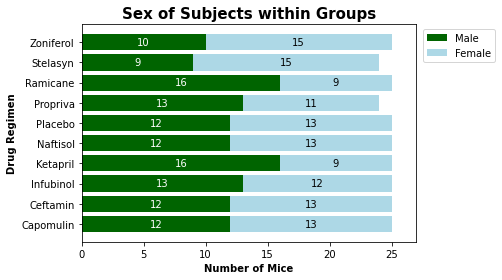

In [114]:
#Stacked bar chart in matplotlib
stacked_plt, stacked_ax = plt.subplots()
stacked_ax.set_xlim(0, 27)
male_bars = stacked_ax.barh(mf_treatment.loc['Male'].index, mf_treatment.loc['Male'], label='Male', color='darkgreen')
female_bars  = stacked_ax.barh(mf_treatment.loc['Female'].index, mf_treatment.loc['Female'], left=mf_treatment.loc['Male'], label='Female',color='lightblue')
stacked_ax.set_ylabel('Drug Regimen',fontweight='bold')
stacked_ax.set_xlabel('Number of Mice', fontweight='bold')
stacked_ax.bar_label(male_bars, label_type='center', color='white')
stacked_ax.bar_label(female_bars, label_type='center')
stacked_ax.legend(loc='best', bbox_to_anchor=(1.25, 1))
plt.title("Sex of Subjects within Groups", fontweight='bold', fontsize='15')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
